In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d prajwalbhamere/car-damage-severity-dataset

 73% 10.0M/13.8M [00:00<00:00, 28.7MB/s]
100% 13.8M/13.8M [00:00<00:00, 40.6MB/s]


In [5]:
!unzip /content/car-damage-severity-dataset.zip

Archive:  /content/car-damage-severity-dataset.zip
  inflating: data3a/training/01-minor/0001.JPEG  
  inflating: data3a/training/01-minor/0002.JPEG  
  inflating: data3a/training/01-minor/0003.JPEG  
  inflating: data3a/training/01-minor/0004.JPEG  
  inflating: data3a/training/01-minor/0005.JPEG  
  inflating: data3a/training/01-minor/0006.JPEG  
  inflating: data3a/training/01-minor/0007.JPEG  
  inflating: data3a/training/01-minor/0008.JPEG  
  inflating: data3a/training/01-minor/0009.JPEG  
  inflating: data3a/training/01-minor/0010.JPEG  
  inflating: data3a/training/01-minor/0011.JPEG  
  inflating: data3a/training/01-minor/0012.JPEG  
  inflating: data3a/training/01-minor/0013.JPEG  
  inflating: data3a/training/01-minor/0014.JPEG  
  inflating: data3a/training/01-minor/0015.JPEG  
  inflating: data3a/training/01-minor/0016.JPEG  
  inflating: data3a/training/01-minor/0017.JPEG  
  inflating: data3a/training/01-minor/0018.JPEG  
  inflating: data3a/training/01-minor/0019.JPEG  

In [6]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

In [8]:
# data augmentation for the testing variable

test_datagen = ImageDataGenerator(rescale =1./255)

In [9]:
x_train = train_datagen.flow_from_directory('/content/data3a/training',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 1383 images belonging to 3 classes.


In [10]:
# data augmentation on the testing data


x_test = test_datagen.flow_from_directory('/content/data3a/validation',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 248 images belonging to 3 classes.


# CNN Model building

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [12]:
# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(3,activation ='softmax')) # output layer

In [13]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])

In [14]:
#training the model

model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 25,validation_data = x_test,validation_steps = len(x_test))

<ipython-input-14-01b33a0951be>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 25,validation_data = x_test,validation_steps = len(x_test))


Epoch 1/25
14/14 [==============================] - 12s 654ms/step - loss: 1.2815 - accuracy: 0.3753 - val_loss: 1.0333 - val_accuracy: 0.3871
Epoch 2/25
14/14 [==============================] - 9s 648ms/step - loss: 1.0313 - accuracy: 0.4512 - val_loss: 0.9862 - val_accuracy: 0.4597
Epoch 3/25
14/14 [==============================] - 9s 618ms/step - loss: 0.9656 - accuracy: 0.5061 - val_loss: 0.9144 - val_accuracy: 0.5484
Epoch 4/25
14/14 [==============================] - 8s 530ms/step - loss: 0.9386 - accuracy: 0.5257 - val_loss: 1.0442 - val_accuracy: 0.4839
Epoch 5/25
14/14 [==============================] - 9s 613ms/step - loss: 0.9077 - accuracy: 0.5575 - val_loss: 0.9614 - val_accuracy: 0.5202
Epoch 6/25
14/14 [==============================] - 9s 625ms/step - loss: 0.8838 - accuracy: 0.5719 - val_loss: 1.0543 - val_accuracy: 0.5040
Epoch 7/25
14/14 [==============================] - 8s 526ms/step - loss: 0.8664 - accuracy: 0.5705 - val_loss: 1.0372 - val_accuracy: 0.5040
Epoch

In [15]:
# save the model

model.save('damage.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
def resize_image(image, size=(256, 256)):
    return tensorflow.image.resize(image, size)

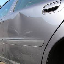

In [18]:
# testing 1

img = image.load_img('/content/data3a/training/01-minor/0001.JPEG',target_size =(64,64))
img

In [19]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['minor','moderate','sever']
op[pred]

1/1 [==============================] - 0s 114ms/step


'minor'

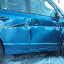

In [20]:
# testing 2

img = image.load_img('/content/data3a/training/02-moderate/0002.JPEG',target_size =(64,64))
img

In [21]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['minor','moderate','sever']
op[pred]

1/1 [==============================] - 0s 25ms/step


'moderate'

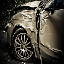

In [22]:
# testing 3

img = image.load_img('/content/data3a/validation/03-severe/0003.JPEG',target_size =(64,64))
img

In [23]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['minor','moderate','sever']
op[pred]

1/1 [==============================] - 0s 25ms/step


'sever'

from tensorflow.keras.preprocessing import image

Load and resize the image to 128x128

img = image.load_img('/content/data3a/training/01-minor/0001.JPEG', target_size=(128, 128))

You can optionally convert the image to a NumPy array for further processing

img_array = image.img_to_array(img)

Now, you can use img_array as input to your CNN model
